<a href="https://colab.research.google.com/github/porchportal/Finance-Prediction-model-/blob/main/EachStockOnMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

import yfinance as yf

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [3]:
from datetime import datetime
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_plotly, plot_components_plotly

#prepare

Begin_data = '2000-1-1'
Today_data = datetime.now().strftime('%Y-%m-%d')
stock = "AAPL"

NameC = yf.Ticker(stock)
data = yf.download(stock, Begin_data, Today_data)

[*********************100%%**********************]  1 of 1 completed


# Prophet

In [4]:
data.reset_index(inplace=True)
data

Date        Open        High         Low       Close   Adj Close  \
0    2000-01-03    0.936384    1.004464    0.907924    0.999442    0.847207   
1    2000-01-04    0.966518    0.987723    0.903460    0.915179    0.775779   
2    2000-01-05    0.926339    0.987165    0.919643    0.928571    0.787131   
3    2000-01-06    0.947545    0.955357    0.848214    0.848214    0.719014   
4    2000-01-07    0.861607    0.901786    0.852679    0.888393    0.753073   
...         ...         ...         ...         ...         ...         ...   
6023 2023-12-11  193.110001  193.490005  191.419998  193.179993  193.179993   
6024 2023-12-12  193.080002  194.720001  191.720001  194.710007  194.710007   
6025 2023-12-13  195.089996  198.000000  194.850006  197.960007  197.960007   
6026 2023-12-14  198.020004  199.619995  196.160004  198.110001  198.110001   
6027 2023-12-15  197.529999  198.399994  197.000000  197.570007  197.570007   

         Volume  
0     535796800  
1     512377600  
2     778321600  
3     767972800  
4     460734400  
...         ...  
6023   60943700  
6024   52696900  
6025   70404200  
6026   66831600  
6027  128256700  

[6028 rows x 7 columns]

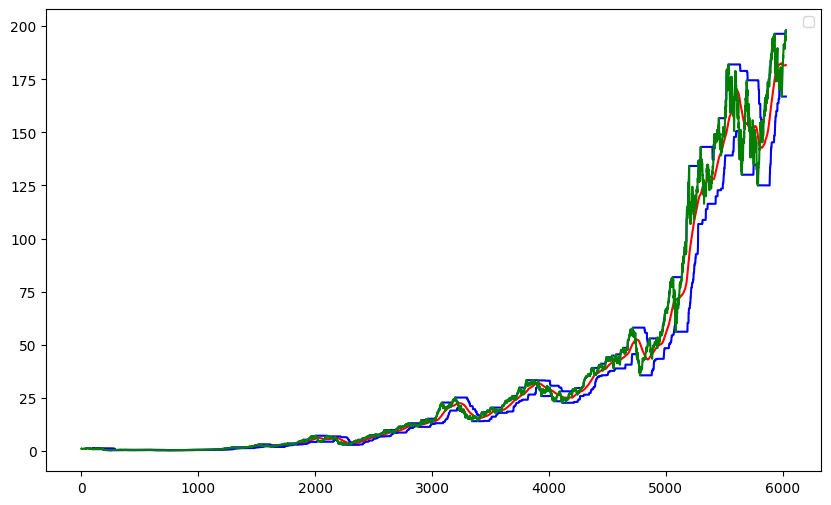

In [5]:
ma_100_days = data.Close.rolling(100).mean()
ma_MIN = data.Close.rolling(100).min()
ma_MAX = data.Close.rolling(100).max()

plt.figure(figsize=(10,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_MIN,'b')
plt.plot(ma_MAX,'b')
plt.plot(data.Close, 'g')
plt.legend()
plt.show()

In [6]:
def load_data(Begin_data = Begin_data, company = NameC):

  history = company.history(start= Begin_data, end= Today_data).reset_index()[['Date','Close']].rename(columns = {'Date':'ds', 'Close':'y'})
  history.ds = history.ds.dt.tz_convert(None)

  return history;

class Premodel1():

    def __init__(self, Begin_data=Begin_data, company=NameC, periods=365, loader=load_data):
        self.Begin = Begin_data
        self.company = company
        self.periods = periods
        self.data = loader(self.Begin, self.company)

        self.model = Prophet()  # MODEL
        self.model.fit(self.data)  # fit data to model

        future = self.model.make_future_dataframe(periods=self.periods)
        self.hist = self.model.predict(future)  # predict dataframe

        self.pred = self.hist[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        self.components = self.hist[['ds', 'trend', 'trend_lower', 'trend_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper']]

    def plotpred(self):
        return plot_plotly(self.model, self.hist, xlabel='Date', ylabel='Closing Price')

    def plotcomponents(self):
        return plot_components_plotly(self.model, self.hist)


In [7]:
model = Premodel1()
model.plotpred()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqiv2sn7/iiwp_38l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqiv2sn7/nyk562dh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99210', 'data', 'file=/tmp/tmpoqiv2sn7/iiwp_38l.json', 'init=/tmp/tmpoqiv2sn7/nyk562dh.json', 'output', 'file=/tmp/tmpoqiv2sn7/prophet_modelf06ybbmb/prophet_model-20231218135534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:55:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:55:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


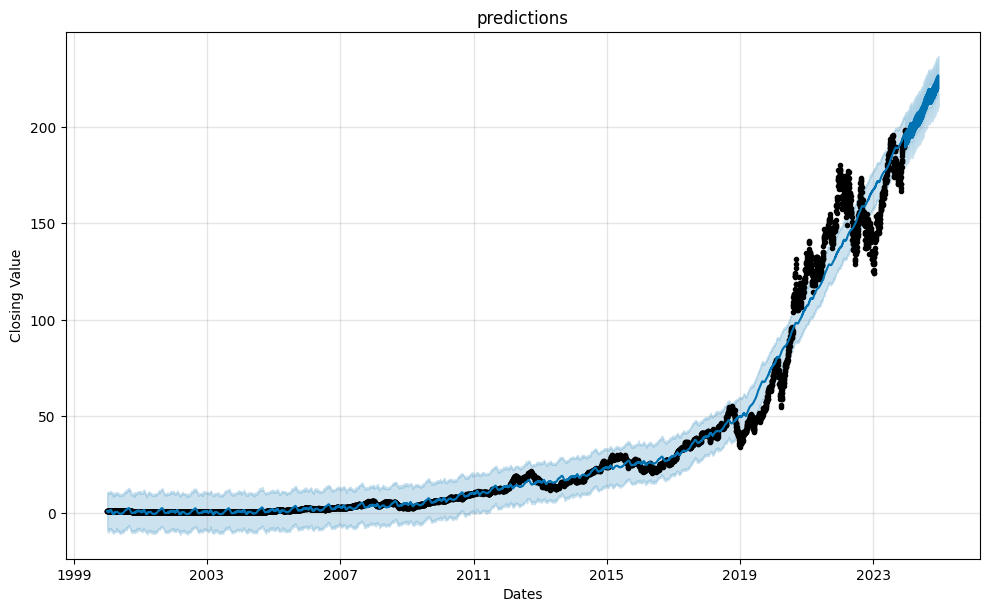

In [8]:
model.model.plot(model.hist)
plt.xlabel('Dates')
plt.ylabel('Closing Value')
plt.title('predictions');

In [9]:
model.plotcomponents()

In [10]:
# Initialize Premodel1 with the calculated periods for prediction up to 2030
premodel = Premodel1(periods=11322)

premodel.plotpred()  # This will plot the predictions

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqiv2sn7/3sm032nt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqiv2sn7/at_g285a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86837', 'data', 'file=/tmp/tmpoqiv2sn7/3sm032nt.json', 'init=/tmp/tmpoqiv2sn7/at_g285a.json', 'output', 'file=/tmp/tmpoqiv2sn7/prophet_model0fg67sk5/prophet_model-20231218135549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:55:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:55:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


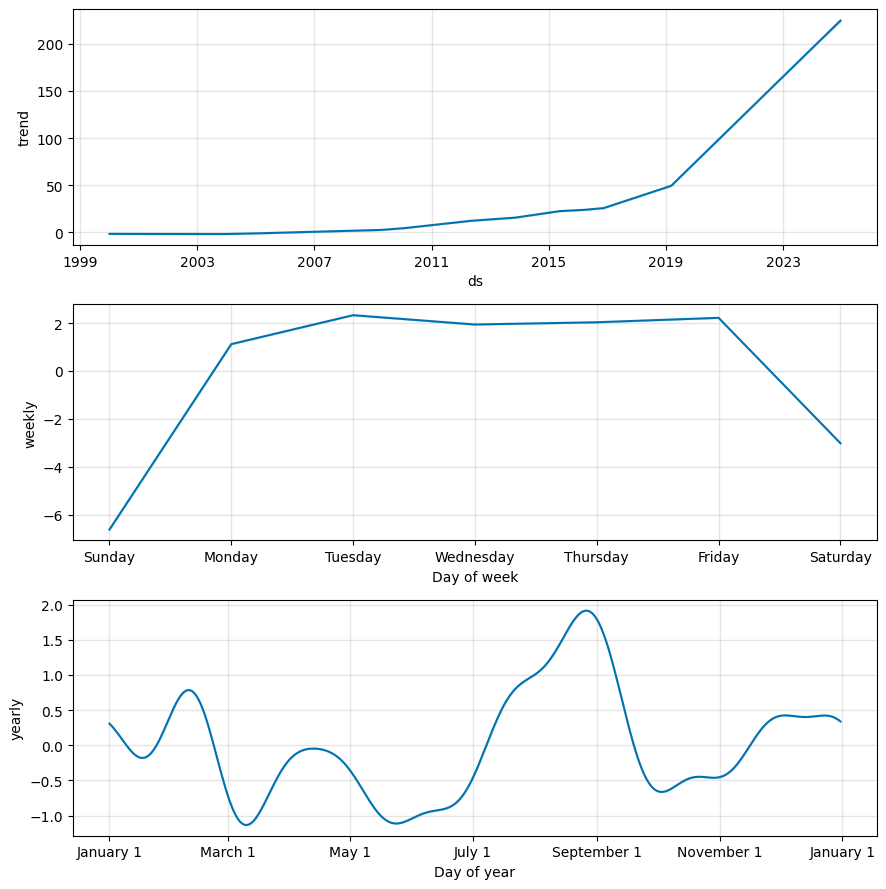

In [11]:
 model.model.plot_components(model.hist,);

In [12]:
def load_data_norm(Begin_data = Begin_data, company = NameC):

    history = company.history(start=Begin_data, end=Today_data).reset_index()[['Date','Close']].rename(columns = {'Date':'ds', 'Close':'y'}) #data mast have ds and y columns
    history.ds = history.ds.dt.tz_convert(None)
    mean = history.y.mean(axis=0)
    std = history.y.std(axis=0)
    history['y'] = (history['y'] - mean)/std

    return history

def load_data_minmax(Begin_data = Begin_data, company = NameC):

    history = company.history(start=Begin_data, end=Today_data).reset_index()[['Date','Close']].rename(columns = {'Date':'ds', 'Close':'y'}) #data mast have ds and y columns
    history.ds = history.ds.dt.tz_convert(None)
    history['y'] = (history['y'] - history['y'].min()) / (history['y'].max() - history['y'].min())

    return history

In [13]:
def load_val(Begin_data = Begin_data, company = NameC):
    data = load_data_norm(Begin_data, company)
    train_data = data[:len(data)-20]                    #last 20 days

    return train_data

In [14]:
model = Premodel1(loader = load_val, periods=100)      #Re-train the model for the new data

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqiv2sn7/cjc7fpw2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqiv2sn7/v8tv08pn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42812', 'data', 'file=/tmp/tmpoqiv2sn7/cjc7fpw2.json', 'init=/tmp/tmpoqiv2sn7/v8tv08pn.json', 'output', 'file=/tmp/tmpoqiv2sn7/prophet_modelbasblbh6/prophet_model-20231218135613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:56:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:56:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
def accuracy(model):                    #We only evaluate the accuracy in those 20 days of prediction

    data = load_data_norm()
    pred = model.hist[len(data)-20:len(data)]
    target = data[len(data)-20:].y

    predmax = pred['yhat_upper']
    predmin = pred['yhat_lower']

    a = ((target < predmax)*(target > predmin)).sum()

    return print(f'The accuracy is = {a/len(target)*100} %')

def accuracys(model, xs, ys):
  count = length(xs)
  countCorrect = 0
  for i in 1..count:
    predicted = model(xs[i])
    if predicted == ys[i]:
      countCorrect += 1
  return countCorrect / count

In [16]:
len(data)

6028

In [17]:
from sklearn.metrics import accuracy_score

accuracy(model)

The accuracy is = 100.0 %


In [18]:
def val_loss(model):                    #We only evaluate the accuracy in those 20 days of prediction

    data = load_data_norm()

    MSE = ((model.hist[len(data)-20:len(data)].yhat - data[len(data)-20:].y)**2).mean()

    return print(f'The validation loss is = {MSE}')

In [19]:
val_loss(model)

The validation loss is = 0.005874225432295285


# LSTM(1)

In [20]:
class RNN(nn.Module):

    def __init__(self, hidden_dim):
        super(RNN, self).__init__()

        self.hidden_dim = hidden_dim
        self.Lstm1 = nn.LSTMCell(1, self.hidden_dim)                   #first layer
        self.Lstm2 = nn.LSTMCell(self.hidden_dim, self.hidden_dim)     #second layer
        # self.Lstm3 = nn.LSTMCell(self.hidden_dim,self.hidden_dim)
        self.linear1 = nn.Linear(self.hidden_dim, 1)                    #final layer for predictions

    def forward(self, input, period = 0):

        outputs = []
        h_t = torch.zeros(input.size(0), self.hidden_dim, dtype=torch.float32)
        c_t = torch.zeros(input.size(0), self.hidden_dim, dtype=torch.float32)
        h_t2 = torch.zeros(input.size(0), self.hidden_dim, dtype=torch.float32)
        c_t2 = torch.zeros(input.size(0), self.hidden_dim, dtype=torch.float32)
        # h_t3 = torch.zeros(input.size(0), self.hidden_dim, dtype=torch.float32)
        # c_t3 = torch.zeros(input.size(0), self.hidden_dim, dtype=torch.float32)

        for input_t in input.split(1, dim=1):

            h_t, c_t = self.Lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.Lstm2(h_t, (h_t2, c_t2))
            # h_t3, c_t3 = self.lstm3(h_t2, (h_t3,c_t3))
            output = self.linear1(h_t2)

            outputs.append(output)

        for i in range(period):               # if we want to predict the future

            h_t, c_t = self.Lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.Lstm2(h_t, (h_t2, c_t2))
            # h_t3, c_t3 = self.lstm3(h_t2, (h_t3,c_t3))
            output = self.linear1(h_t2)

            outputs.append(output)

        outputs = torch.cat(outputs, dim=1)

        return outputs


In [21]:
x = torch.linspace(0,50,120)
y = torch.sin(x).view(1,-1)

y = (y - y.mean())/y.std()  # Normalization

data = y

y_train = data[:,:100]        #Train in the first 100 points

data_train = y_train
test_target = data[:,100:]

train_data = y_train[:,:-1]
train_target = y_train[:,1:]

In [22]:
RNNmodel = RNN(hidden_dim=51)    #Load Model

loss_function = nn.MSELoss() #MSE loss

optimizer = optim.Adam(RNNmodel.parameters(), lr = 0.01, weight_decay=0)
#Adam optim with weight decay to decrease overfitting.

In [23]:
def train(model):                #Train loop

    n_steps = 60

    period = 20

    total_loss = []
    total_val_loss = []

    for i in range(n_steps):

        RNNmodel.train()

        out = RNNmodel(train_data)

        loss = loss_function(out,train_target)

        total_loss.append(loss)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f'loss = {loss}')

        with torch.no_grad():

            RNNmodel.eval()

            pred = RNNmodel(train_data, period)

            val_loss = loss_function(pred[:,-20:-1], data[:,pred.size(1) - pred[:,-20:-1].size(1):pred.size(1)])
            #we compute the loss on 19 points
            #that were not used during training

            total_val_loss.append(val_loss)

            print(f'val loss = {val_loss}')

        # scheduler.step(val_loss)

    return total_loss, total_val_loss

In [24]:
total_loss, total_val_loss = train(RNNmodel)

loss = 0.9853418469429016
val loss = 1.1297426223754883
loss = 0.9454121589660645
val loss = 1.112525463104248
loss = 0.8885195851325989
val loss = 1.0712250471115112
loss = 0.7745924592018127
val loss = 0.9380208253860474
loss = 0.529666543006897
val loss = 0.25685375928878784
loss = 0.13693471252918243
val loss = 0.5457960367202759
loss = 0.21359997987747192
val loss = 0.6239930391311646
loss = 0.30835768580436707
val loss = 0.1625213325023651
loss = 0.16291850805282593
val loss = 0.18143172562122345
loss = 0.11659333109855652
val loss = 0.0952700823545456
loss = 0.059064798057079315
val loss = 0.04137997701764107
loss = 0.04172288626432419
val loss = 0.06290265172719955
loss = 0.06374243646860123
val loss = 0.08848099410533905
loss = 0.09099595993757248
val loss = 0.0826675295829773
loss = 0.0996491089463234
val loss = 0.06991533935070038
loss = 0.08983182162046432
val loss = 0.06561393290758133
loss = 0.07106403261423111
val loss = 0.05556328594684601
loss = 0.04994937777519226
val

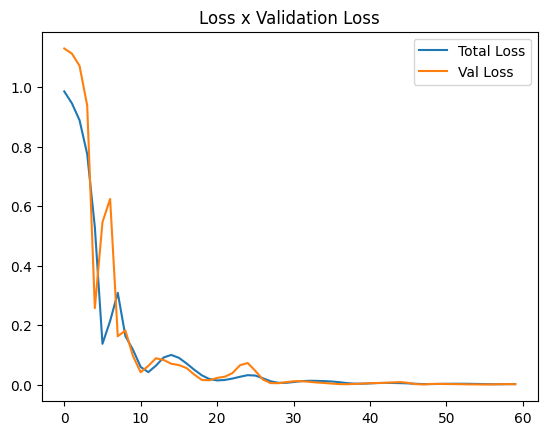

In [25]:
with torch.no_grad():

    plt.plot(total_loss, label = 'Total Loss')
    plt.plot(total_val_loss, label = 'Val Loss')
    plt.title('Loss x Validation Loss')
    plt.legend()

# LSTM(2)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

<Axes: xlabel='Date'>

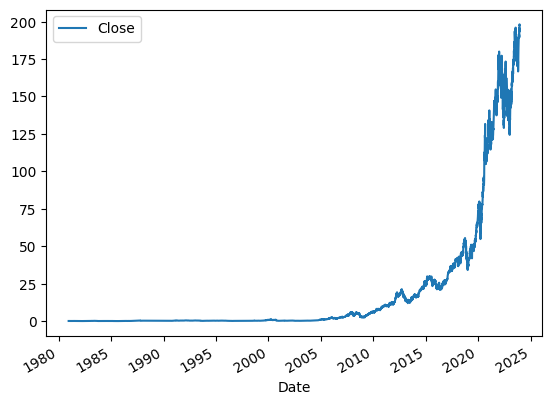

In [27]:
NameC = NameC.history(period="max")
NameC.plot.line(y="Close", use_index=True)

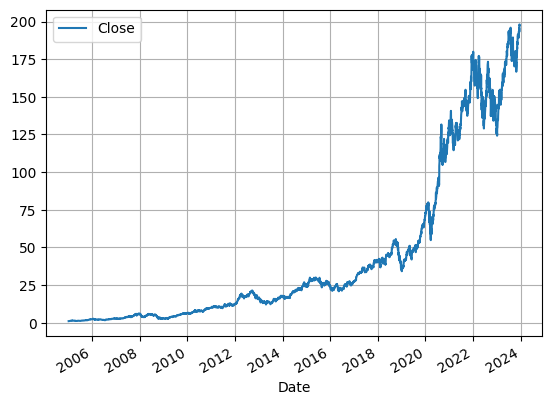

In [28]:
# Only use values after the year 2005
NameC = NameC.loc["2005-01-01":].copy()
NameC.plot.line(y="Close", use_index=True)
plt.grid()
prices = NameC['Close'].values.reshape(-1,1)

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

In [30]:
Train_size = int(len(prices_scaled)* 0.95)
Train_data = prices_scaled[:Train_size]
Test_data = prices_scaled[Train_size:]

In [31]:
def create_sequences(data, sequence_length):
  sequences = []
  for i in range(len(data) - sequence_length):
    Sequence = data[i:i+sequence_length]
    target = data[i+sequence_length]
    sequences.append((Sequence, target))
  return np.array(sequences)

sequence_length = 40      # How many days we want to look back for training and giving a prediction
Train_sequences = create_sequences(Train_data, sequence_length)
Test_sequences = create_sequences(Test_data, sequence_length)

<ipython-input-31-e6e38f847e30>:7: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [32]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Modify this line to convert the sequences to a tuple of NumPy arrays
Train_input = np.array([Sequence for Sequence, _ in Train_sequences])
Train_target = np.array([target for _, target in Train_sequences])

# Then, use train_input and train_target in model.fit
model.fit(Train_input, Train_target, epochs=40, batch_size=64)

Epoch 1/40
71/71 [==============================] - 8s 48ms/step - loss: 0.0052
Epoch 2/40
71/71 [==============================] - 3s 44ms/step - loss: 1.8205e-04
Epoch 3/40
71/71 [==============================] - 3s 45ms/step - loss: 1.8788e-04
Epoch 4/40
71/71 [==============================] - 5s 64ms/step - loss: 1.7397e-04
Epoch 5/40
71/71 [==============================] - 3s 46ms/step - loss: 1.6014e-04
Epoch 6/40
71/71 [==============================] - 3s 44ms/step - loss: 1.6761e-04
Epoch 7/40
71/71 [==============================] - 3s 45ms/step - loss: 1.6174e-04
Epoch 8/40
71/71 [==============================] - 5s 66ms/step - loss: 1.5125e-04
Epoch 9/40
71/71 [==============================] - 3s 44ms/step - loss: 1.4633e-04
Epoch 10/40
71/71 [==============================] - 4s 57ms/step - loss: 1.4763e-04
Epoch 11/40
71/71 [==============================] - 5s 75ms/step - loss: 1.5939e-04
Epoch 12/40
71/71 [==============================] - 4s 52ms/step - loss: 1.73

In [34]:
# Modify this line to convert the sequences to a tuple of NumPy arrays
Test_input = np.array([Sequence for Sequence, _ in Test_sequences])
Test_target = np.array([target for _, target in Test_sequences])

Test_Loss = model.evaluate(Test_input, Test_target)

# Make predictions on the test set
predicted_prices = model.predict(Test_input)

# Inverse transform the scaled predictions to original prices
predicted_prices = scaler.inverse_transform(predicted_prices)

7/7 [==============================] - 1s 12ms/step


In [35]:
# Get the models predicted price values
Train_predict = model.predict(Train_input)
Test_predict = model.predict(Test_input)

# transform to original form
Train_predict = scaler.inverse_transform(Train_predict)
Test_predict = scaler.inverse_transform(Test_predict)

7/7 [==============================] - 0s 12ms/step


In [36]:
# Get the root mean squared error (RMSE)
rmse_train = np.sqrt(np.mean(((Train_predict - scaler.inverse_transform(Train_target)) ** 2)))
rmse_test  = np.sqrt(np.mean(((Test_predict  - scaler.inverse_transform(Test_target))  ** 2)))

print('Train Score: %.2f RMSE' % (rmse_train))
print('Test Score: %.2f RMSE' % (rmse_test))

Train Score: 1.59 RMSE
Test Score: 4.04 RMSE


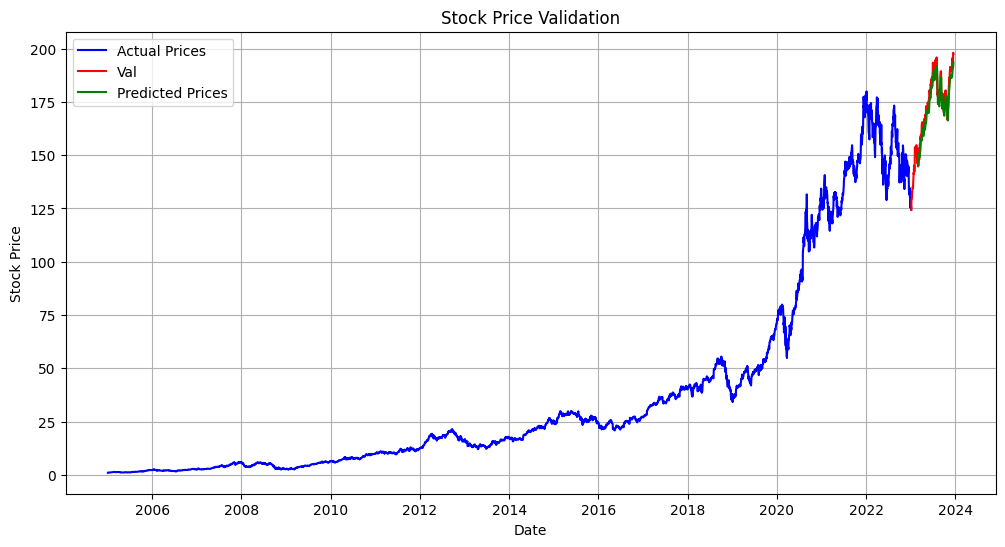

In [37]:
# Plot the actual historical data and predicted future prices
plt.figure(figsize=(12, 6))
#plt.plot(NameC.index, NameC['Close'], label='Historical Prices', color='black')
plt.plot(NameC.index[:Train_size], prices[:Train_size], label='Actual Prices', color='blue')
plt.plot(NameC.index[Train_size:], prices[Train_size:], label='Val', color='r')
plt.plot(NameC.index[Train_size+sequence_length:Train_size+predicted_prices.size+sequence_length], predicted_prices, label='Predicted Prices', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Validation')
plt.legend()
plt.grid()
plt.show()

In [38]:
predicted_prices.shape
NameC.index[Train_size:].shape

(239,)

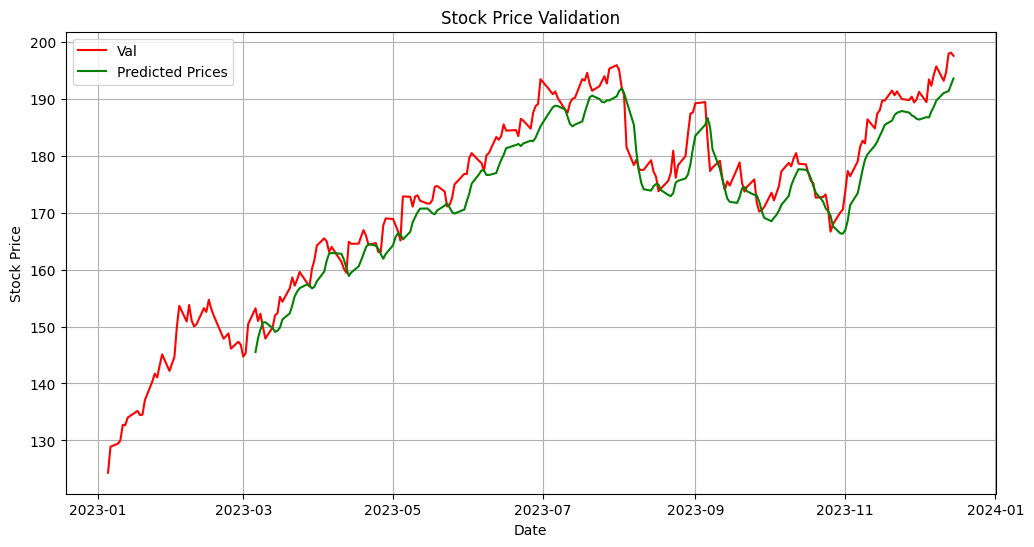

In [45]:
# Plot the actual historical data and predicted future prices
plt.figure(figsize=(12, 6))
# plt.plot(sp500['Date'], sp500['Close'], label='Historical Prices', color='blue')
# plt.plot(sp500.index, sp500['Close'], label='Historical Prices', color='black')                 # Works fine
# plt.plot(sp500.index[:train_size], prices[:train_size], label='Actual Prices', color='blue')    # Works fine, but intentionaly removed here
plt.plot(NameC.index[Train_size:], prices[Train_size:], label='Val', color='r')
plt.plot(NameC.index[Train_size+sequence_length : Train_size+predicted_prices.size+sequence_length], predicted_prices, label='Predicted Prices', color='g')
# plt.plot(sp500.index[train_size : train_size+predicted_prices.size], predicted_prices, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Validation')
plt.legend()
plt.grid()
plt.show()

*Future Prediction*

In [40]:
last_sequence = Test_input[-1]

print(Test_input.shape)
print(last_sequence.shape)

(199, 40, 1)
(40, 1)


In [41]:
future_time_steps = 20
future_predictions = []

for _ in range(future_time_steps):
  # Predict the next price
  next_price = model.predict(last_sequence.reshape(1, sequence_length, 1))

  # Append the predicted price to the list
  future_predictions.append(next_price[0, 0])

  # Update the last_sequence by removing the first element and adding the predicted price
  last_sequence = np.concatenate((last_sequence[1:], next_price), axis=None)

1/1 [==============================] - 0s 45ms/step


<ipython-input-42-8c79b1972475>:5: FutureWarning:

Argument `closed` is deprecated in favor of `inclusive`.



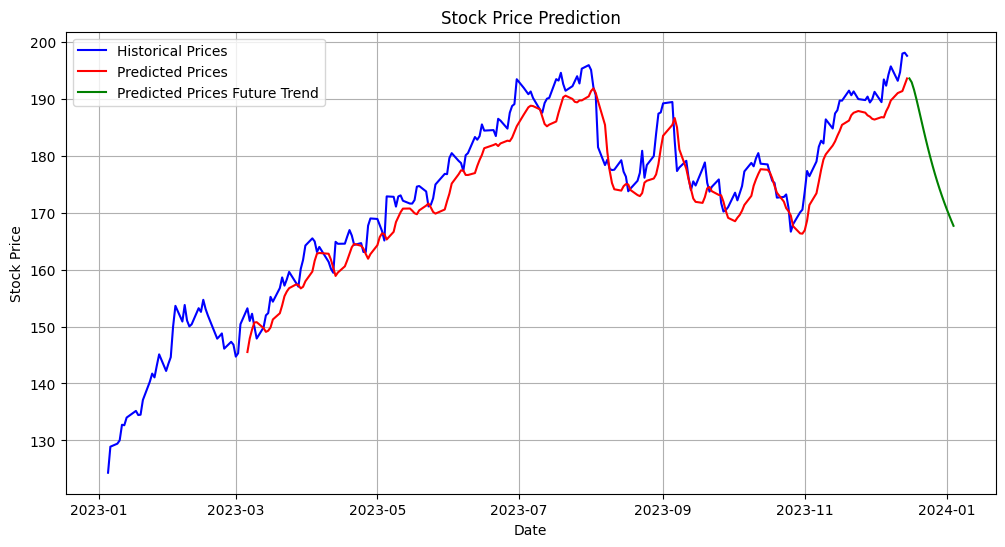

In [42]:
# Inverse transform the scaled predictions to original prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a time axis for future predictions
time_axis = pd.date_range(start=NameC.index[-1], periods=future_time_steps + 1, closed='right')

# Plot the actual historical data and predicted future prices
plt.figure(figsize=(12, 6))
#plt.plot(NameC.index, NameC['Close'], label='Historical Prices', color='blue')
plt.plot(NameC.index[Train_size:], NameC['Close'][Train_size:], label='Historical Prices', color='blue')
#plt.plot(time_axis[1:], future_predictions, label='Predicted Prices', color='red')
plt.plot(NameC.index[Train_size+sequence_length:Train_size+predicted_prices.size+sequence_length], predicted_prices, label='Predicted Prices', color='red')
plt.plot(time_axis[:], future_predictions, label='Predicted Prices Future Trend', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.grid()
plt.show()

<ipython-input-44-ac8578385ddb>:42: FutureWarning:

Argument `closed` is deprecated in favor of `inclusive`.

<ipython-input-44-ac8578385ddb>:42: FutureWarning:

Argument `closed` is deprecated in favor of `inclusive`.

<ipython-input-44-ac8578385ddb>:42: FutureWarning:

Argument `closed` is deprecated in favor of `inclusive`.

<ipython-input-44-ac8578385ddb>:42: FutureWarning:

Argument `closed` is deprecated in favor of `inclusive`.



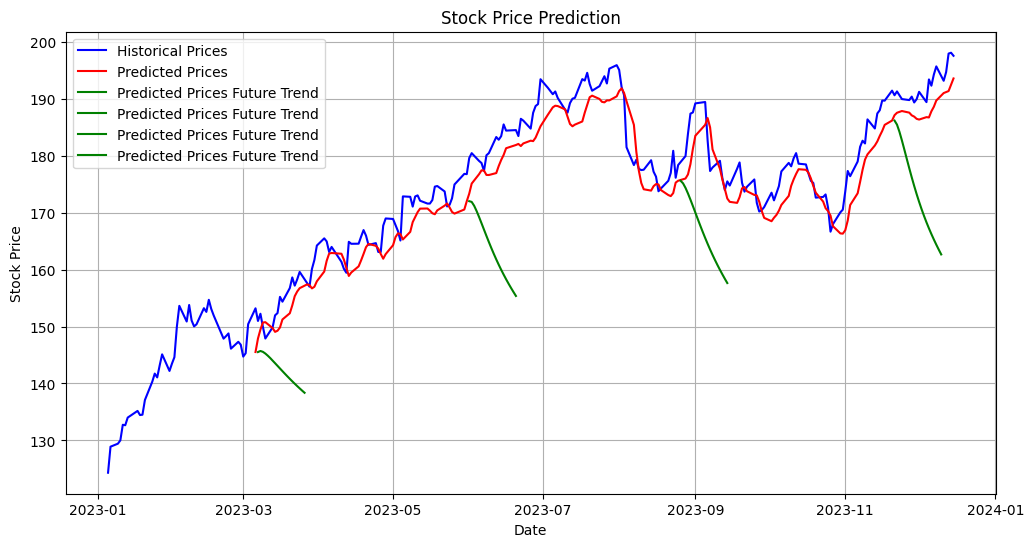

In [44]:
# Multiple predictions from multiple points

# Number of future time steps to predict
# future_time_steps = 10  # Adjust as needed

# How many days we want our predictions to starts from
start_day = 0
interval_gap = 60

fig = plt.figure(figsize=(12, 6))

# Plot the actual historical data and predicted future prices

# plt.plot(sp500.index, sp500['Close'], label='Historical Prices', color='blue')
fig = plt.plot(NameC.index[Train_size:], NameC['Close'][Train_size:], label='Historical Prices', color='blue')
# plt.plot(time_axis[1:], future_predictions, label='Predicted Prices', color='red')
plt.plot(NameC.index[Train_size+sequence_length:Train_size+predicted_prices.size+sequence_length], predicted_prices, label='Predicted Prices', color='red')     # Works  # Comment later

for i in range(start_day, Test_input.shape[0], interval_gap):
    # Get the most recent sequence from your test data
    last_sequence = Test_input[i]

    # print(test_input.shape)
    # print(last_sequence.shape)

    future_predictions = []

    for j in range(future_time_steps):
        # Predict the next price
        next_price = model.predict(last_sequence.reshape(1, sequence_length, 1), verbose=0)

        # Append the predicted price to the list
        future_predictions.append(next_price[0, 0])

        # Update the last_sequence by removing the first element and adding the predicted price
        last_sequence = np.concatenate((last_sequence[1:], next_price), axis=None)

    # Inverse transform the scaled predictions to original prices
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Create a time axis for future predictions
    time_axis = pd.date_range(start=NameC.index[Train_size+sequence_length+i], periods=future_time_steps + 1, closed='right')

    # if j == future_time_steps - 1:
      # plt.plot(time_axis[:], future_predictions, label='Predicted Prices Future Trend', color='green') # sequence_length
    plt.plot(time_axis[:], future_predictions, label='Predicted Prices Future Trend', color='green')
    # else:
    #   plt.plot(time_axis[:], future_predictions, color='green')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.grid()
plt.show()

# Linear Regression

In [ ]:
stock = "TSLA"
data = yf.download(stock, Begin_data, Today_data)

data.head(5)

In [ ]:
#data.plot.scatter("High","Close")
import matplotlib.pyplot as plt

data.plot.scatter("High","Close")
plt.plot([1,400], [-1,400], 'r')

Linear Regression Equation

y = mx + c

In [ ]:
from sklearn.linear_model import LinearRegression

#Fit
lr = LinearRegression()
lr.fit(data[["High"]],data["Close"])

#plot
data.plot.scatter("High", "Close")
plt.plot(data["High"], lr.predict(data[["High"]]), color="r")

In [ ]:
print(f"Weight: {lr.coef_[0]:.2f}")
print(f"Bias: {lr.intercept_:.2f}")

# implementation


In [ ]:
PREDICTORS = ["High", "Low", "Open"]
TARGET = "Close"

# Ensure we get the same split every time
np.random.seed(0)

split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in
                                                            split_data]

In [ ]:
import math

def init_params(predictors):
  # Initialize model parameters
  k = math.sqrt(1/predictors)     #reduce weight and Biases initially

  # random check the same result
  np.random.seed(0)
  weights = np.random.rand(predictors, 1) * 2 * k - k
  biases = np.ones((1, 1)) * 2 * k - k
  return  [weights, biases]

In [ ]:
def forward(params, x):
  weights, biases = params
  # Multiply x values by w values with matrix multiplication, then add b
  prediction = x @ weights + biases
  return prediction

def mse(actual, predicted):
    # Calculate mean squared error
    return np.mean((actual - predicted) ** 2)

def mse_grad(actual, predicted):
    # The derivative of mean squared error
    return predicted - actual

def backward(params, x, lr, grad):
    # Multiply the gradient by the x values
    # Divide x by the number of rows in x to avoid updates that are too large
    w_grad = (x.T / x.shape[0]) @ grad
    b_grad = np.mean(grad, axis=0)

    params[0] -= w_grad * lr
    params[1] -= b_grad * lr

    return params

In [ ]:
lr = 1e-4
epochs = 50000
params = init_params(train_x.shape[1])

# Store weights and gradients so we can visualize
# Not necessary for algorithm
sample_rate = 100
samples = int(epochs / sample_rate)
historical_ws = np.zeros((samples, train_x.shape[1]))
historical_gradient = np.zeros((samples,))

for i in range(epochs):
    predictions = forward(params, train_x)
    grad = mse_grad(train_y, predictions)

    params = backward(params, train_x, lr, grad)

    # Store historical weights for visualization
    if i % sample_rate == 0:
        index = int(i / sample_rate)
        historical_gradient[index] = np.mean(grad)
        historical_ws[index,:] = params[0][:,0]

    # Display validation loss
    if i % 10000 == 0:
        predictions = forward(params, valid_x)
        valid_loss = mse(valid_y, predictions)

        print(f"Epoch {i} validation loss: {valid_loss}")

In [ ]:
params

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and a 3D axis
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20,50)

# Plot the path of the optimization algorithm
ax.plot3D(historical_ws[:,0], historical_ws[:,1], historical_gradient, 'green', linewidth=3, zorder=10)

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
# Replace these with your actual data
historical_ws = np.random.rand(100, 2)  # For 2D and 3D x, y coordinates
historical_gradient = np.random.rand(100)  # For 3D z coordinates

# Create a figure for the 3D plot
fig_3d = plt.figure()
ax_3d = fig_3d.add_subplot(111, projection='3d')

# Set the view angle for the 3D plot
ax_3d.view_init(20, 50)

# Plot the path of the optimization algorithm in 3D
ax_3d.plot3D(historical_ws[:,0], historical_ws[:,1], historical_gradient, 'green', linewidth=3)

# Create a figure for the 2D plot
fig_2d, ax_2d = plt.subplots()

# Plot the path of the optimization algorithm in 2D
ax_2d.plot(historical_ws[:,0], historical_ws[:,1], 'blue', linewidth=3)

# Show the plots
plt.show()


In [ ]:
predictions = forward(params, test_x)
mse(test_y, predictions) #performance of regression models

# Top 5 company on the market

In [ ]:
stock_symbols = ["TELA","NFLX","AAPL","MSFT","GOOGL"]

# Start and end dates
start_date = "2008-11-01"
end_date = "2023-11-01"

# Fetching stock data
stock_data = {}
for symbol in stock_symbols:
    stock_data[symbol] = yf.download(symbol, start=start_date, end=end_date)

# Fetching stock data
stock_data = {symbol: yf.download(symbol, start=start_date, end=end_date) for symbol in stock_symbols}


In [ ]:
# Statistical Summary
for symbol, data in stock_data.items():
    print(f"Statistical Summary for {symbol} Stock:")
    styled_description = data.describe().style.background_gradient(cmap='coolwarm')\
                                          .format("{:.2f}")\
                                          .set_table_attributes('style="font-size: 12px; border: 1px solid black;"')\
                                          .set_caption(f"Descriptive Statistics of {symbol}")
    display(styled_description)
    print("\n")

In [ ]:
import time
from datetime import datetime
# Handling missing Value
for symbol, data in stock_data.items():
  data.dropna(inplace = True)
  data.interpolate(inplace = True)

# Displaying the data
for symbol, data in stock_data.items():
    print(f"Stock data for {symbol}:\n")
    print(data.tail())
    #display(data())  # Display the first few rows of each stock's data
    print("\n")

In [ ]:
plt.figure(figsize = (14, 7))
for symbol, data in stock_data.items():
  plt.plot(data.index, data['Close'], label = f'{symbol}')
plt.title("stock")
plt.xlabel("Year")
plt.ylabel("Closing")
plt.legend()
plt.show()

# RNN Model Implementation

In [ ]:
import tensorflow as tf
from tensorflow import keras

# testing soimething unknow

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.8)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.8): len(data)])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

datas_train_scale = scaler.fit_transform(data_train)

In [ ]:
x= []
y = []

for i in range(100, datas_train_scale.shape[0]):
  x.append(datas_train_scale[i-100:i])
  y.append(datas_train_scale[i: 0])

x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

In [ ]:
model.summary()

In [ ]:
import matplotlib.pyplot as plt

data_test = pd.concat([data_train.tail(100), data_test], ignore_index= True)
data_test_scale = scaler.fit_transform(data_test)
y_predict = model.predict(x)
Scale = 1/scaler.scale_

history = model.fit(x, y, epochs=50, batch_size=32, verbose=0)
predictions = model.predict(x)

plt.plot(history.history['loss'])
plt.plot(predictions.flatten())
plt.legend(['Loss', 'Predicted Price'])
plt.show()


In [ ]:
# Reshaping y_predict and y to be 1D arrays
#y_predict = y_predict.reshape(-1) * Scale
#y = y.reshape(-1) * Scale


plt.figure(figsize=(10,8))
'''plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
#plt.legend()'''
predicted_test_prices = model.predict(data_test_scale)
real_test_prices = scaler.inverse_transform(data_test)[:, 0]

plt.plot(real_test_prices)
plt.plot(predicted_test_prices.flatten() * Scale)
plt.legend(['Real Price', 'Predicted Price'])

plt.show()